[0.028 0.024 0.04  0.016 0.03  0.011 0.015 0.031 0.    0.056 0.053 0.052
 0.05  0.06  0.029 0.007 0.064 0.039 0.048 0.05  0.05  0.062 0.048 0.138]


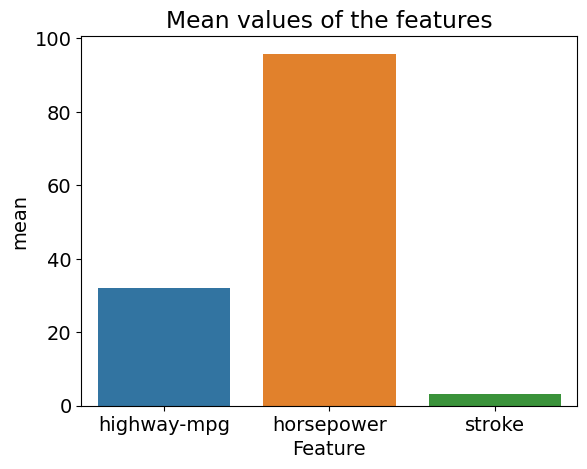

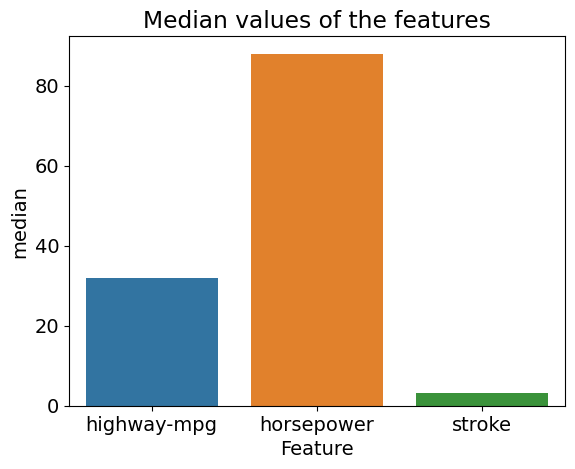

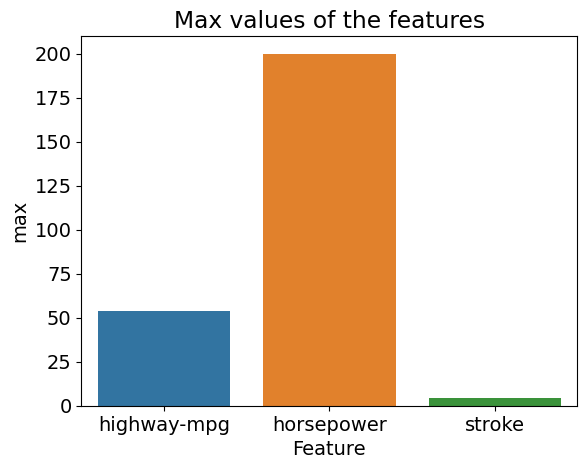

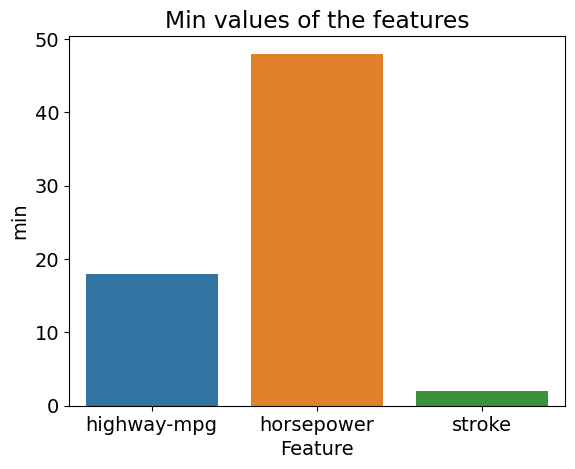

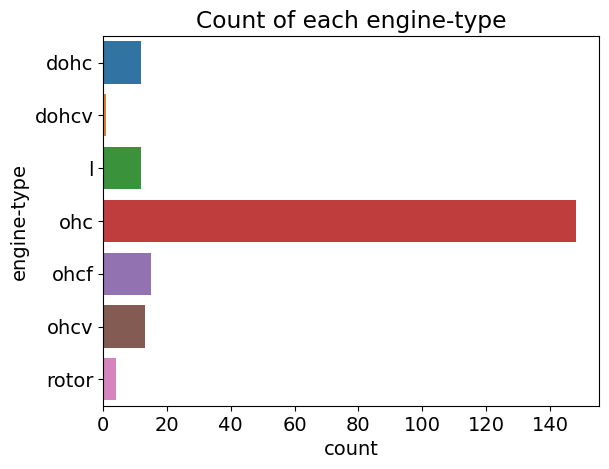

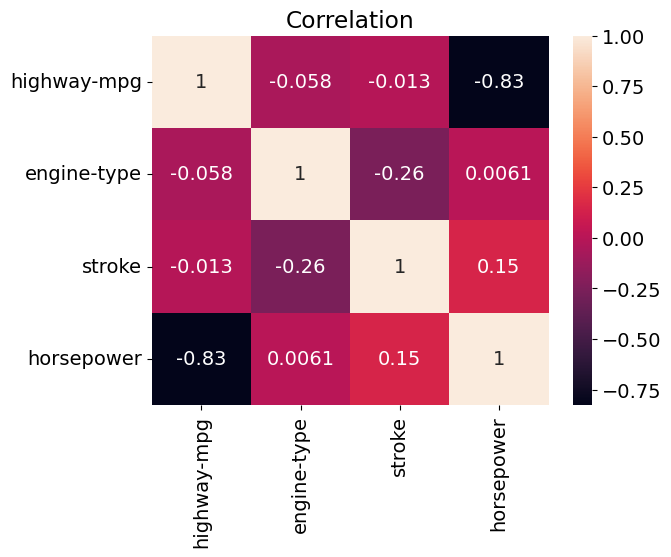

Num Features: 4
Selected Features: [False False False False  True False False False False False False False
 False False  True False False False  True  True False False False False]
Feature Ranking: [ 5 17  8 18  1  6  4  3 21 13 14 11 10 19  1 12 16  2  1  1  7 15 20  9]


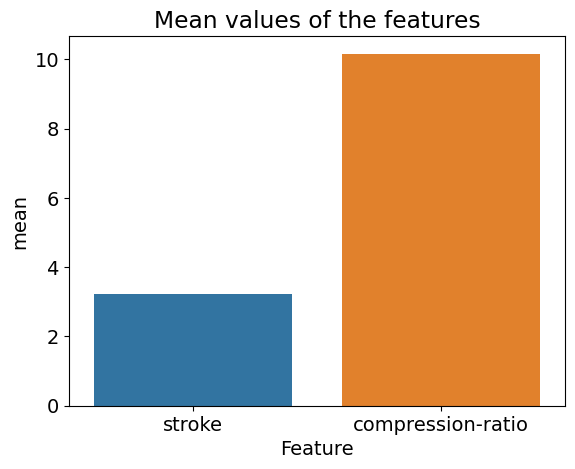

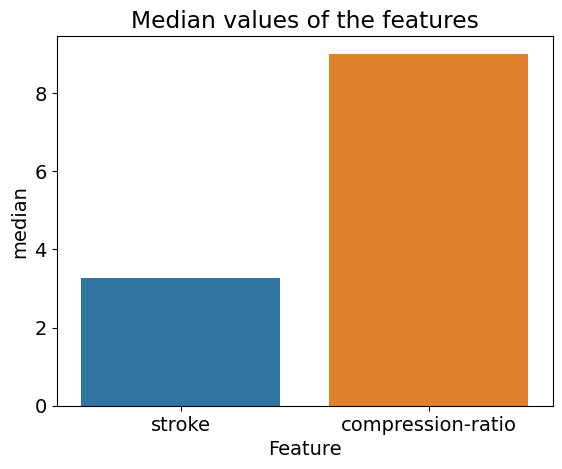

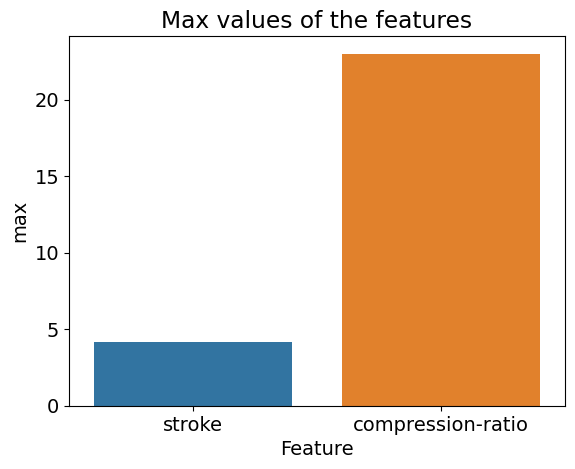

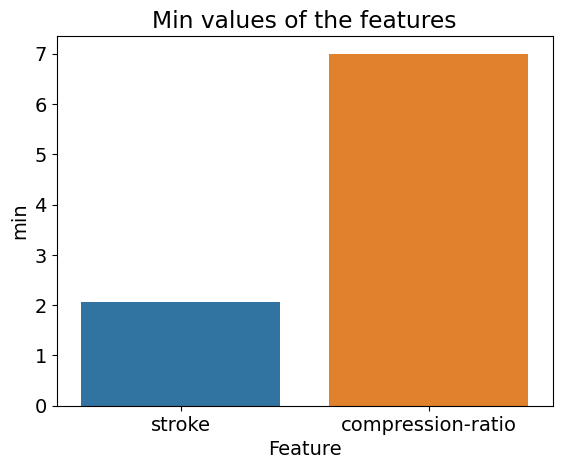

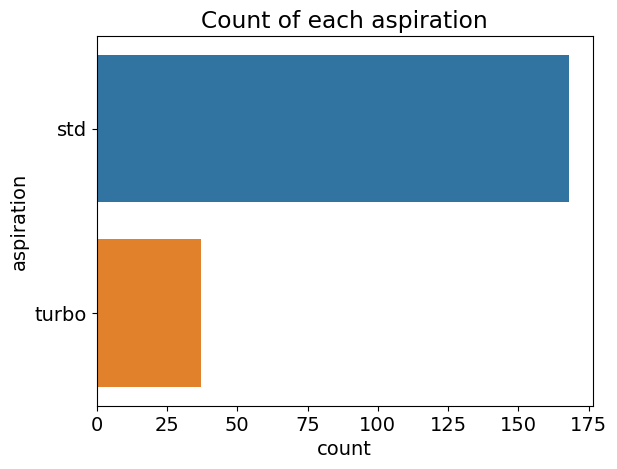

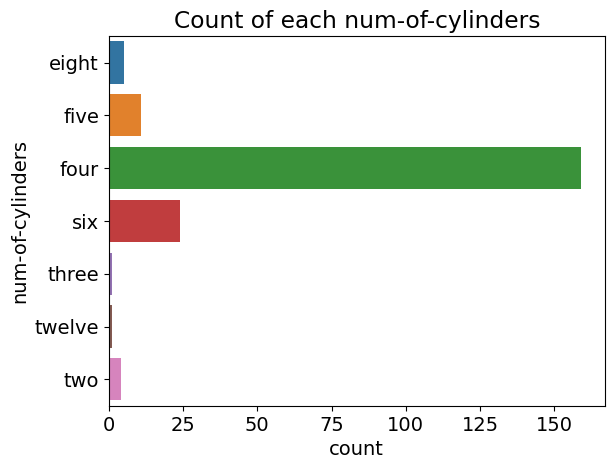

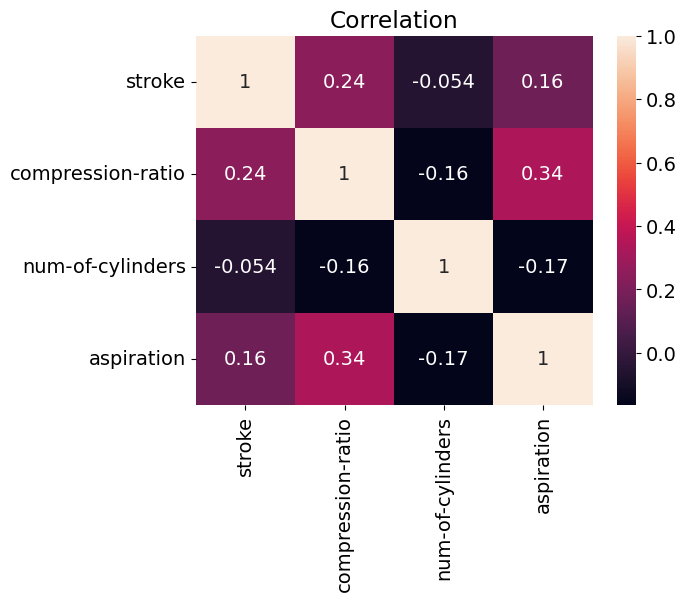

[  1.48    1.771   1.36    4.653   3.102   1.29    1.547   2.638     nan
   7.013  14.142  14.797   2.049  22.839   6.822   4.24   15.778   9.197
   4.959   2.495   5.086  22.515   1.657 144.863]
[[2337 109 '102' 24]
 [2824 136 '115' 18]
 [2844 136 '110' 19]
 [3086 131 '140' 17]
 [2395 108 '101' 23]]
                    mean  median     max     min
highway-mpg    32.081761    32.0    54.0    18.0
peak-rpm     5113.836478  5200.0  6600.0  4150.0


d:\Miniconda\envs\Labs\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [8] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
d:\Miniconda\envs\Labs\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


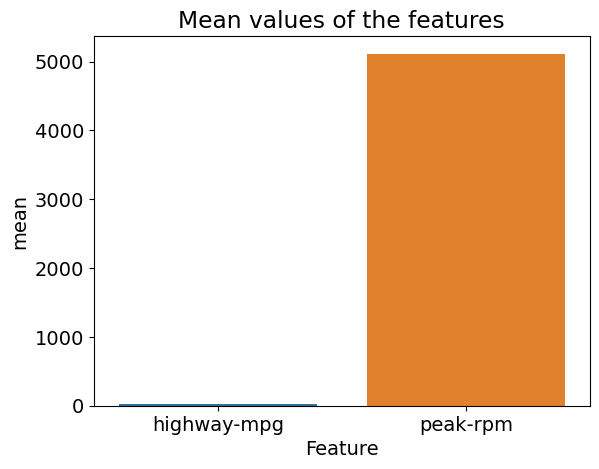

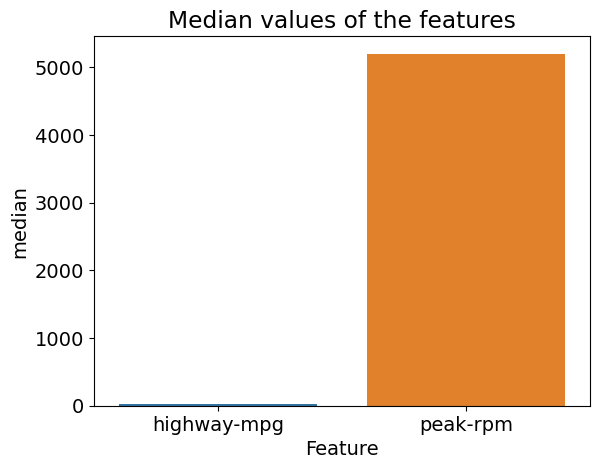

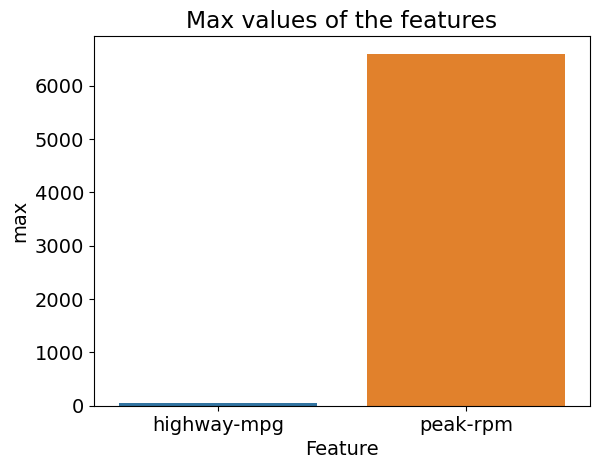

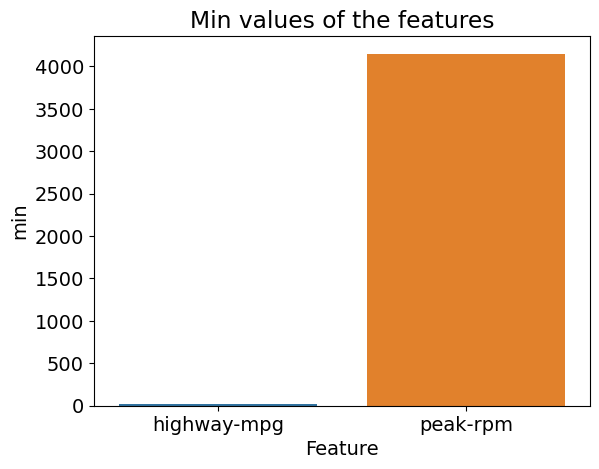

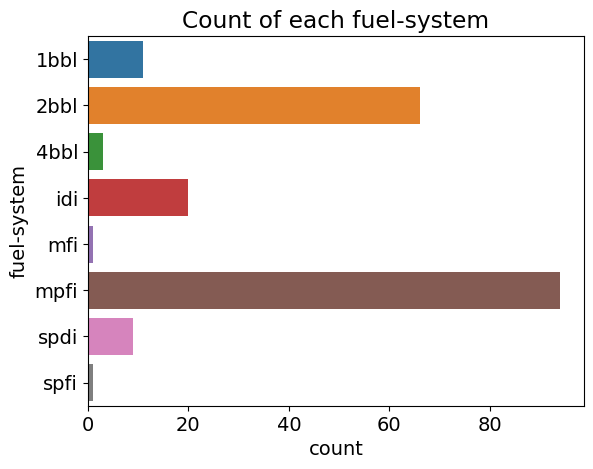

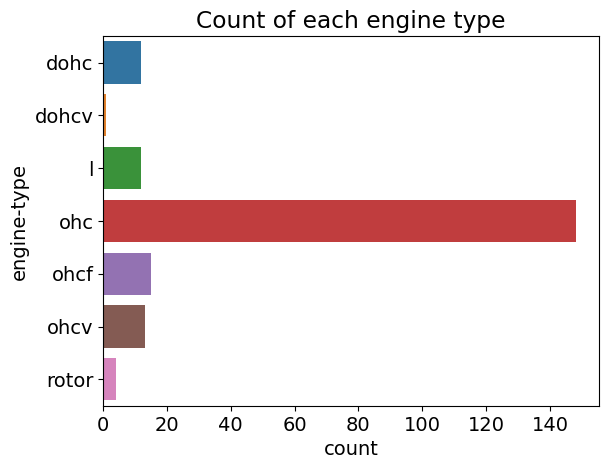

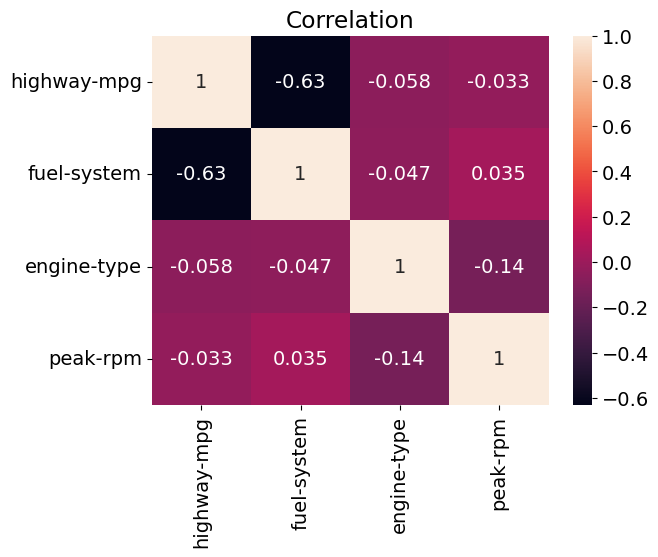

In [4]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import set_printoptions
import numpy as np
import matplotlib as mpl
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing 
from sklearn.decomposition import PCA
import warnings
#from GA import Genetic_Algorithm # import the python script with GA.
pd.options.mode.chained_assignment = None  # default='warn'
warnings.simplefilter(action='ignore', category=FutureWarning)

mpl.rcParams["font.size"] = 14
#mpl.rcParams['figure.figsize'] = [18,14]

df = pd.read_csv('Automobile_data.csv', sep = ',')
df2 = pd.read_csv('Automobile_data.csv', sep = ',')

df.loc[df["normalized-losses"]=='?', "normalized-losses"] = "Unknown"
df.loc[df["price"]=='?', "price"] = "Unknown"
df.loc[df["num-of-doors"]=='?', "num-of-doors"] = "Unknown"
df.loc[df["bore"]=='?', "bore"] = "Unknown"
df.loc[df["stroke"]=='?', "stroke"] = "Unknown"
df.loc[df["peak-rpm"]=='?', "peak-rpm"] = "Unknown"
df.loc[df["horsepower"]=='?', "horsepower"] = "Unknown"

indexNormalizedLosses = df[df['normalized-losses'] == 'Unknown'].index
df.drop(indexNormalizedLosses , inplace=True)
indexPrice = df[df['price'] == 'Unknown'].index
df.drop(indexPrice , inplace=True)
indexNumOfDoors = df[df['num-of-doors'] == 'Unknown'].index
df.drop(indexNumOfDoors , inplace=True)
indexBore = df[df['bore'] == 'Unknown'].index
df.drop(indexBore , inplace=True)
indexStroke = df[df['stroke'] == 'Unknown'].index
df.drop(indexStroke , inplace=True)
indexPeakRPM = df[df['peak-rpm'] == 'Unknown'].index
df.drop(indexPeakRPM , inplace=True)
indexHorsepower = df[df['horsepower'] == 'Unknown'].index
df.drop(indexHorsepower , inplace=True)

label_encoder = preprocessing.LabelEncoder() 
dfForEncoder = df
dfForEncoder['make']= label_encoder.fit_transform(dfForEncoder['make']) 
dfForEncoder['fuel-type']= label_encoder.fit_transform(dfForEncoder['fuel-type']) 
dfForEncoder['aspiration']= label_encoder.fit_transform(dfForEncoder['aspiration']) 
dfForEncoder['num-of-doors']= label_encoder.fit_transform(dfForEncoder['num-of-doors']) 
dfForEncoder['body-style']= label_encoder.fit_transform(dfForEncoder['body-style']) 
dfForEncoder['drive-wheels']= label_encoder.fit_transform(dfForEncoder['drive-wheels']) 
dfForEncoder['engine-location']= label_encoder.fit_transform(dfForEncoder['engine-location']) 
dfForEncoder['engine-type']= label_encoder.fit_transform(dfForEncoder['engine-type']) 
dfForEncoder['num-of-cylinders']= label_encoder.fit_transform(dfForEncoder['num-of-cylinders']) 
dfForEncoder['fuel-system']= label_encoder.fit_transform(dfForEncoder['fuel-system']) 

#Feature selection
array = dfForEncoder.values
X = array[:,0:24]
Y = array[:,24]
Y = Y.astype('float')
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)

df_firstMethod_Numeric = df[['highway-mpg', 'horsepower', 'stroke']]
df_firstMethod_Numeric['stroke'] = df_firstMethod_Numeric['stroke'].astype('float')
df_firstMethod_Numeric['horsepower'] = df_firstMethod_Numeric['horsepower'].astype('float')
df_firstMethod_Numeric['highway-mpg'] = df_firstMethod_Numeric['highway-mpg'].astype('float')
df_firstMethod_String = df2[['engine-type']]

df_firstMethod_describe = pd.DataFrame()
df_firstMethod_describe['mean'] = df_firstMethod_Numeric.mean()
df_firstMethod_describe['median'] = df_firstMethod_Numeric.median()
df_firstMethod_describe['max'] = df_firstMethod_Numeric.max()
df_firstMethod_describe['min'] = df_firstMethod_Numeric.min()

df_firstMethod_meanGraph = sns.barplot(x='index', y= 'mean', data=df_firstMethod_describe['mean'].reset_index(name = "mean"))
plt.xlabel('Feature')
df_firstMethod_meanGraph.set(title = 'Mean values of the features')
plt.show()

df_firstMethod_medianGraph =  sns.barplot(x='index', y= 'median', data=df_firstMethod_describe['median'].reset_index(name = "median"))
plt.xlabel('Feature')
df_firstMethod_medianGraph.set(title = 'Median values of the features')
plt.show()

df_firstMethod_maxGraph =  sns.barplot(x='index', y= 'max', data=df_firstMethod_describe['max'].reset_index(name = "max"))
plt.xlabel('Feature')
df_firstMethod_maxGraph.set(title = 'Max values of the features')
plt.show()

df_firstMethod_minGraph =  sns.barplot(x='index', y= 'min', data=df_firstMethod_describe['min'].reset_index(name = "min"))
plt.xlabel('Feature')
df_firstMethod_minGraph.set(title = 'Min values of the features')
plt.show()

df_firstMethod_enginetype =  sns.barplot(x='count', y= 'engine-type', data=df_firstMethod_String.groupby('engine-type').size().reset_index(name = "count"))
plt.xlabel('count')
df_firstMethod_enginetype.set(title = 'Count of each engine-type')
plt.show()

df_firstMethod_correlation = sns.heatmap(df[['highway-mpg', 'engine-type', 'stroke', 'horsepower']].corr(), annot=True)
df_firstMethod_correlation.set(title = 'Correlation')
plt.show()

#Recursive feature elimination

array = dfForEncoder.values
X = array[:,0:24]
Y = array[:,24]
Y = Y.astype('float')
# feature extraction
model = LogisticRegression(solver='liblinear', max_iter=200)
rfe = RFE(model,  n_features_to_select=4, step=1)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

df_secondMethod_Numeric = df[['stroke', 'compression-ratio']]
df_secondMethod_Numeric['stroke'] = df_secondMethod_Numeric['stroke'].astype('float')
df_secondMethod_Numeric['compression-ratio'] = df_secondMethod_Numeric['compression-ratio'].astype('float')
df_secondMethod_String = df2[['num-of-cylinders', 'aspiration']]

df_secondMethod_describe = pd.DataFrame()
df_secondMethod_describe['mean'] = df_secondMethod_Numeric.mean()
df_secondMethod_describe['median'] = df_secondMethod_Numeric.median()
df_secondMethod_describe['max'] = df_secondMethod_Numeric.max()
df_secondMethod_describe['min'] = df_secondMethod_Numeric.min()

df_secondMethod_meanGraph = sns.barplot(x='index', y= 'mean', data=df_secondMethod_describe['mean'].reset_index(name = "mean"))
plt.xlabel('Feature')
df_secondMethod_meanGraph.set(title = 'Mean values of the features')
plt.show()

df_secondMethod_medianGraph =  sns.barplot(x='index', y= 'median', data=df_secondMethod_describe['median'].reset_index(name = "median"))
plt.xlabel('Feature')
df_secondMethod_medianGraph.set(title = 'Median values of the features')
plt.show()

df_secondMethod_maxGraph =  sns.barplot(x='index', y= 'max', data=df_secondMethod_describe['max'].reset_index(name = "max"))
plt.xlabel('Feature')
df_secondMethod_maxGraph.set(title = 'Max values of the features')
plt.show()

df_secondMethod_minGraph =  sns.barplot(x='index', y= 'min', data=df_secondMethod_describe['min'].reset_index(name = "min"))
plt.xlabel('Feature')
df_secondMethod_minGraph.set(title = 'Min values of the features')
plt.show()

df_secondMethod_fuelSystem =  sns.barplot(x='count', y= 'aspiration', data=df_secondMethod_String.groupby('aspiration').size().reset_index(name = "count"))
plt.xlabel('count')
df_secondMethod_fuelSystem.set(title = 'Count of each aspiration')
plt.show()

df_secondMethod_engineType =  sns.barplot(x='count', y= 'num-of-cylinders', data=df_secondMethod_String.groupby('num-of-cylinders').size().reset_index(name = "count"))
plt.xlabel('count')
df_secondMethod_engineType.set(title = 'Count of each num-of-cylinders')
plt.show()

df_secondMethod_correlation = sns.heatmap(df[['stroke', 'compression-ratio', 'num-of-cylinders', 'aspiration']].corr(), annot=True)
df_secondMethod_correlation.set(title = 'Correlation')
plt.show()

#Univariate Selection
array = dfForEncoder.values
X = array[:,0:24]
Y = array[:,24]
Y = Y.astype('float')
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

df_thirdMethodNumeric = df[['highway-mpg', 'peak-rpm']]
df_thirdMethodNumeric['highway-mpg'] = df_thirdMethodNumeric['highway-mpg'].astype('float')
df_thirdMethodNumeric['peak-rpm'] = df_thirdMethodNumeric['peak-rpm'].astype('float')
df_thirdMethodString = df2[['engine-type', 'fuel-system']]

df_thirdMethod_describeNumeric = pd.DataFrame()
df_thirdMethod_describeNumeric['mean'] = df_thirdMethodNumeric.mean()
df_thirdMethod_describeNumeric['median'] = df_thirdMethodNumeric.median()
df_thirdMethod_describeNumeric['max'] = df_thirdMethodNumeric.max()
df_thirdMethod_describeNumeric['min'] = df_thirdMethodNumeric.min()

print(df_thirdMethod_describeNumeric)

df_thirdMethod_meanGraph = sns.barplot(x='index', y= 'mean', data=df_thirdMethod_describeNumeric['mean'].reset_index(name = "mean"))
plt.xlabel('Feature')
df_thirdMethod_meanGraph.set(title = 'Mean values of the features')
plt.show()

df_thirdMethod_medianGraph =  sns.barplot(x='index', y= 'median', data=df_thirdMethod_describeNumeric['median'].reset_index(name = "median"))
plt.xlabel('Feature')
df_thirdMethod_medianGraph.set(title = 'Median values of the features')
plt.show()

df_thirdMethod_maxGraph =  sns.barplot(x='index', y= 'max', data=df_thirdMethod_describeNumeric['max'].reset_index(name = "max"))
plt.xlabel('Feature')
df_thirdMethod_maxGraph.set(title = 'Max values of the features')
plt.show()

df_thirdMethod_minGraph =  sns.barplot(x='index', y= 'min', data=df_thirdMethod_describeNumeric['min'].reset_index(name = "min"))
plt.xlabel('Feature')
df_thirdMethod_minGraph.set(title = 'Min values of the features')
plt.show()

df_thirdMethod_fuelSystem =  sns.barplot(x='count', y= 'fuel-system', data=df_thirdMethodString.groupby('fuel-system').size().reset_index(name = "count"))
plt.xlabel('count')
df_thirdMethod_fuelSystem.set(title = 'Count of each fuel-system')
plt.show()

df_thirdMethod_engineType =  sns.barplot(x='count', y= 'engine-type', data=df_thirdMethodString.groupby('engine-type').size().reset_index(name = "count"))
plt.xlabel('count')
df_thirdMethod_engineType.set(title = 'Count of each engine type')
plt.show()

df_thirdMethod_correlation = sns.heatmap(df[['highway-mpg', 'fuel-system', 'engine-type', 'peak-rpm']].corr(), annot=True)
df_thirdMethod_correlation.set(title = 'Correlation')
plt.show()